In [1]:
import csv
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
def convert_float(string_list):
    float_list = [float(x) for x in string_list]
    return float_list

def get_data(file_name):
    
    data_file = None
    
    with open(f"simulation_data/FIG5_Dataset/{file_name}", 'r') as read_obj:

        # Return a reader object which will
        # iterate over lines in the given csvfile
        csv_reader = csv.reader(read_obj)

        # convert string to list
        data_file = list(csv_reader)
    
    data_file = [convert_float(x) for x in data_file]
    
    return data_file

In [3]:
num_nodes = 32
num_edges = 48

xqaoa_betas = get_data("xqaoa_betas.csv")
xqaoa_gammas = get_data("xqaoa_gammas.csv")
xqaoa_costs = list(itertools.chain(*get_data("xqaoa_costs.csv")))

In [4]:
def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

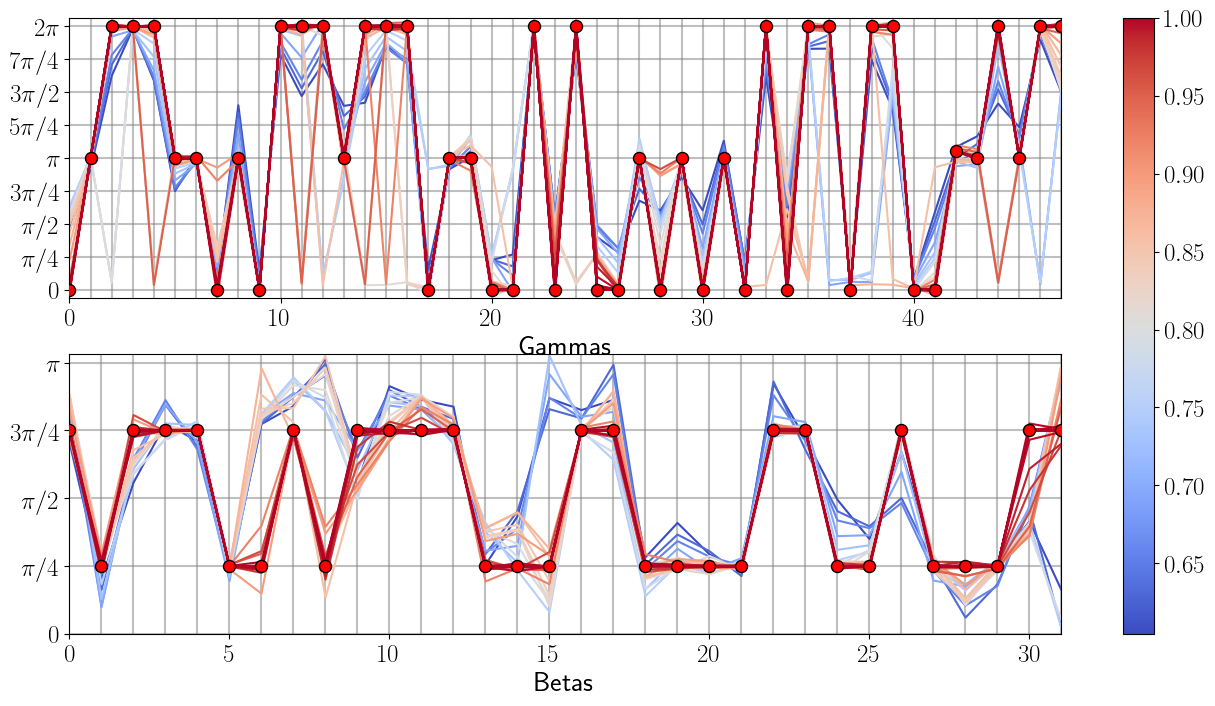

In [5]:
pi_list = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4, 2*np.pi]
pi_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$", r"$5\pi/4$", r"$3\pi/2$", r"$7\pi/4$", r"$2\pi$"]

fig = plt.figure(figsize=(16,8))
mpl.rc('text', usetex = True)

ax1 = fig.add_subplot(211)
for i in range(0, num_edges):
    ax1.axvline(x = i, color = 'grey', alpha=0.5)
for i in pi_list:
    ax1.axhline(y = i, color = 'grey', alpha=0.5)
lc = multiline([range(num_edges) for _ in range(len(xqaoa_gammas))], xqaoa_gammas, xqaoa_costs, ax=ax1, cmap="coolwarm")
ax1.scatter(range(num_edges), xqaoa_gammas[-1], s=75, c="red", edgecolors="black", zorder=3)
ax1.set_yticks(pi_list, pi_labels, size=18)
ax1.set_xlim(0, num_edges-1)
ax1.set_ylim(-0.2, 2*np.pi+0.2)
ax1.set_xlabel("Gammas", size=20)

plt.xticks(fontsize=18)

ax2 = fig.add_subplot(212)
for i in range(0, num_nodes):
    ax2.axvline(x = i, color = 'grey', alpha=0.5)
for i in pi_list:
    ax2.axhline(y = i, color = 'grey', alpha=0.5)
lc = multiline([range(num_nodes) for _ in range(len(xqaoa_betas))], xqaoa_betas,  xqaoa_costs, ax=ax2, cmap="coolwarm")
ax2.scatter(range(num_nodes), xqaoa_betas[-1], s=75, c="red", edgecolors="black", zorder=3)
ax2.set_yticks(pi_list, pi_labels, size=18)
ax2.set_xlim(0, num_nodes-1)
ax2.set_ylim(0, np.pi+0.1)
ax2.set_xlabel("Betas", size=20)
#plt.yticks(rotation = 90)

plt.xticks(fontsize=18)

cbar = fig.colorbar(lc, ax=[ax1, ax2])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(18)
plt.savefig("XQAOA_Angles.pdf",bbox_inches='tight')